In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

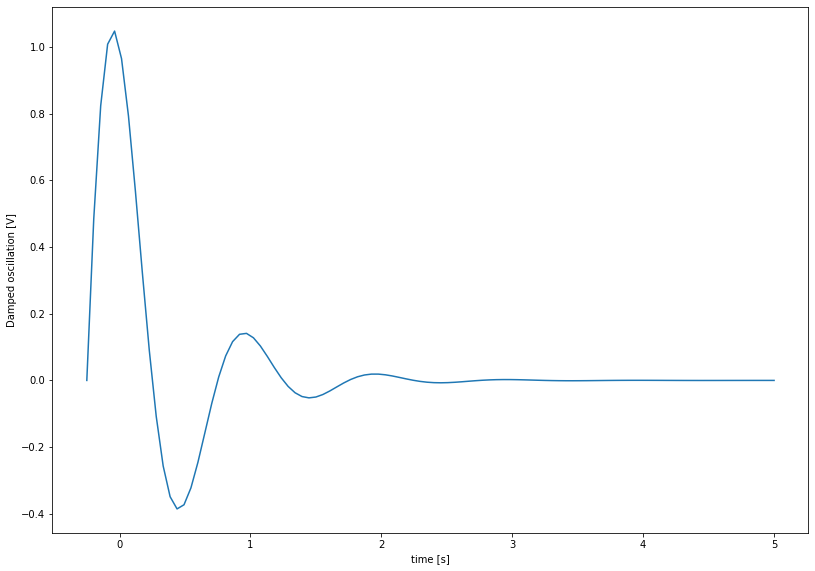

In [2]:


x1 = np.linspace(-0.25, 5.0, 100)
y1 = np.cos(2 * np.pi * x1) * np.exp(-2*x1)

fig, ax = plt.subplots(figsize=(15, 10))
fig.subplots_adjust(bottom=0.15, left=0.2)
ax.plot(x1, y1)
ax.set_xlabel('time [s]')
ax.set_ylabel('Damped oscillation [V]')

plt.show()

In [3]:
noise_level = 0.1

def f1(x, noise_level=noise_level):
    return np.sin(5 * x[0]) * (1 - np.tanh(x[0] ** 2))\
           + np.random.randn() * noise_level

def f2(x, noise_level=noise_level):
    return (4 * np.cos(2 * np.pi * x[0]) - 2.5) * np.exp(-2.5*x[0])\
           + np.random.randn() * noise_level * np.exp(-3*abs(x[0]-0.4))

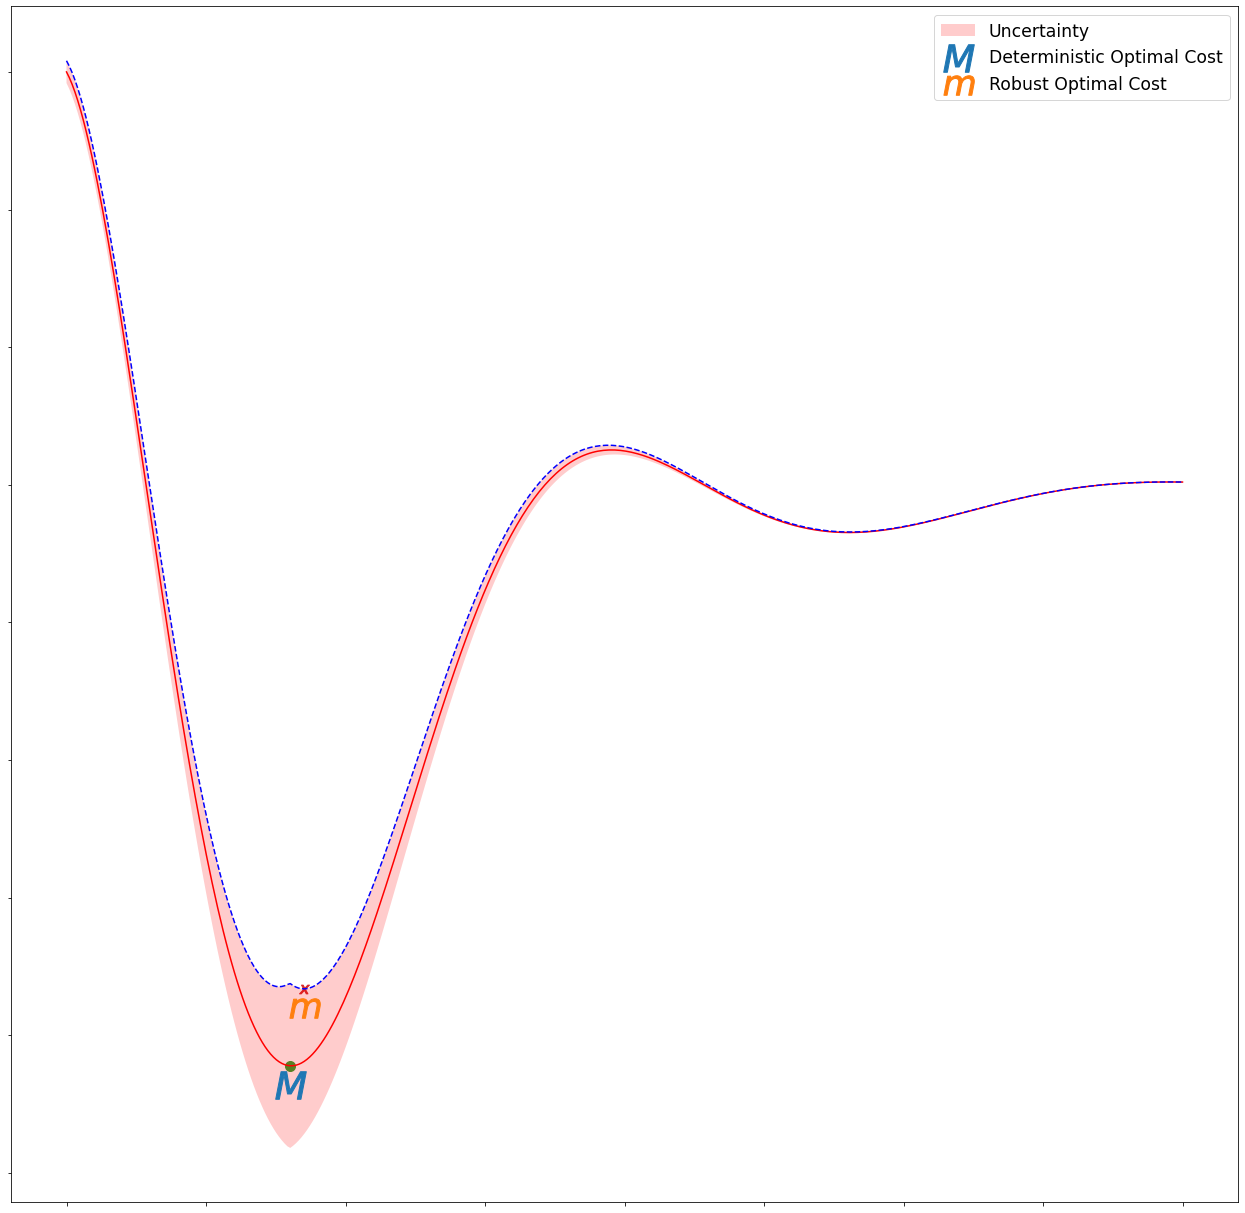

In [4]:
# Plot f(x) + contours
x = np.linspace(0, 2, 400).reshape(-1, 1)
fx_noise = [f2(x_i, noise_level=0.0) for x_i in x]
fx = [f2(x_i, noise_level=0) for x_i in x]

fig, ax = plt.subplots(figsize=(22, 22))
plt.plot(x, fx, "r")
x_backward = x[::-1]
fx_lower_bound = [fx_i - 3 * np.exp(-5*abs(x[index]-0.4)) * noise_level for index, fx_i in enumerate(fx_noise)]
fx_upper_bound = [fx_i + 3 * np.exp(-5*abs(x_backward[index]-0.4)) * noise_level for index, fx_i in enumerate(fx_noise[::-1])]


plt.plot(x, fx_upper_bound[::-1], "b--")

C_min = np.min(fx)
C_min_locx = np.where(fx == C_min)
#print(C_min_locx)

E_C_min = np.min(fx_upper_bound)
E_C_min_locx = np.where(fx_upper_bound[::-1] == E_C_min)
#print(E_C_min_locx)

plt.scatter(x[C_min_locx],C_min-0.07,s=1000,marker = "$M$",label="Deterministic Optimal Cost",zorder=2)
plt.scatter(x[E_C_min_locx],E_C_min-0.07,s=1000,marker = '$m$',label="Robust Optimal Cost",zorder=2)

plt.scatter(x[C_min_locx],C_min,s=100)
plt.scatter(x[E_C_min_locx],E_C_min,marker = '$x$',s=100)


plt.fill(np.concatenate([x, x[::-1]]), np.concatenate((fx_lower_bound, fx_upper_bound)), alpha=.2, fc="r", ec="None",label="Uncertainty")
plt.legend(fontsize ="xx-large")
ax.set_xticklabels([])
ax.set_yticklabels([])

#plt.grid()
plt.show()